**Tutorial 1**

Run the code: full block - press arrow or ctrl+enter.

Separate lines - highlight and ctrl+shift+enter

To see variables press on {x}. Press on variable name to see its content



In [1]:
# import packages

import numpy as np # arrays, array operations
import scipy.stats as stats # statistics
from google.colab import files
import matplotlib.pyplot as plt # plot graphs
import pandas as pd
import io


In [ ]:
#load data
# Height weight example
#upload and read from PC/Drive
# after running press 'Choose File'
from google.colab import files # upload and save files

uploaded = files.upload()

data = pd.read_csv(io.BytesIO(uploaded['Davis.csv']))

for col in data.columns: # see names of the columns in a loop
    print(col)

print(data)

Saving Davis.csv to Davis.csv
subject
sex
weight
height
repwt
repht
     subject sex  weight  height  repwt  repht
0          1   M      77     182   77.0  180.0
1          2   F      58     161   51.0  159.0
2          3   F      53     161   54.0  158.0
3          4   M      68     177   70.0  175.0
4          5   F      59     157   59.0  155.0
..       ...  ..     ...     ...    ...    ...
195      196   M      74     175   71.0  175.0
196      197   M      83     180   80.0  180.0
197      198   M      81     175    NaN    NaN
198      199   M      90     181   91.0  178.0
199      200   M      79     177   81.0  178.0

[200 rows x 6 columns]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

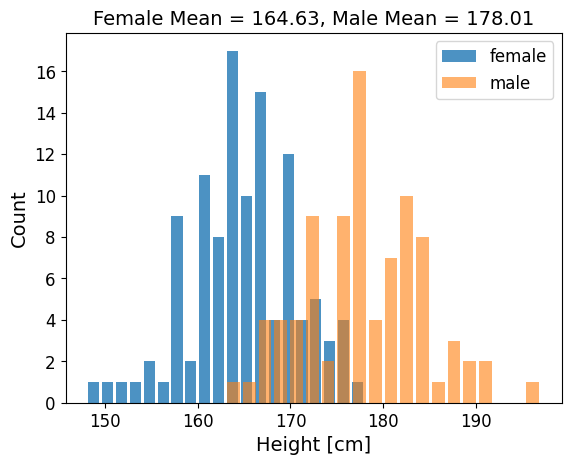

In [ ]:
# plot data

height = data.height
num_bins, bin_width = 20, 0.8

height_f = height[data.sex == 'F']
height_m = height[data.sex == 'M']

bin_edges = np.arange(30,130,10)
alpha, histtype = 0.6, 'stepfilled'

plt.hist(height_f, bins = 20, rwidth = 0.8, label = 'female', alpha = 0.8)
plt.hist(height_m, bins = 20, rwidth = 0.8, label = 'male', alpha = 0.6)
plt.xlabel('Height [cm]', fontsize = 14)
plt.ylabel('Count', fontsize = 14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.title(f'Female Mean = {round(height_f.mean(), 2)}, Male Mean = {round(height_m.mean(), 2)}', fontsize = 14)

plt.savefig("height_sep.png", bbox_inches='tight')
files.download("height_sep.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

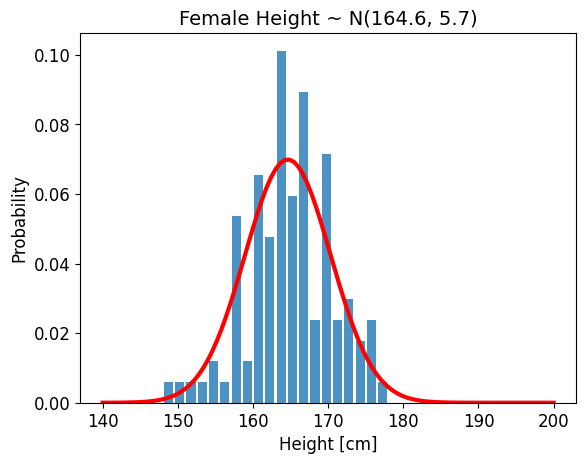

In [ ]:
#pdf
fig = plt.figure()
plt.hist(height_f, bins = num_bins, rwidth = bin_width, alpha = 0.8, density = True)

pdf_f = stats.norm.pdf(np.linspace(140, 200, 100), height_f.mean(), height_f.std())
plt.plot(np.linspace(140, 200, 100), pdf_f, color = 'red', lw = 3)
plt.ylabel('Probability', fontsize = 12)
plt.xlabel('Height [cm]', fontsize = 12)
plt.title(f'Female Height ~ N({round(height_f.mean(),1)}, {round(height_f.std(),1)})', fontsize = 14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.savefig("height_pdf.png", bbox_inches='tight')
files.download("height_pdf.png")

Central Tendency

(0.0, 0.8)

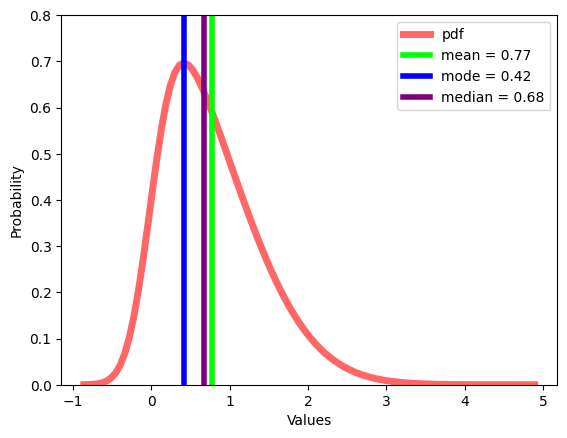

In [ ]:
# generate population distribution
mean, var, skew, kurt = stats.skewnorm.stats(4, moments='mvsk')
x = np.linspace(stats.skewnorm.ppf(0.00001, 4), stats.skewnorm.ppf(0.999999, 4), 100)
plt.plot(x, stats.skewnorm.pdf(x, 4), 'r-', lw = 5, alpha = 0.6, label = 'pdf')
r = stats.skewnorm.rvs(4, size = 10000) #get some values
#get pdf for computing mode
t=stats.skewnorm.pdf(x, 4)

data_mode = x[np.argmax(t)] #mode is the value with the highest occurence
data_median = np.median(r)

plt.plot([mean, mean] , [0, 0.8], color = 'lime', linewidth = 4,
           label = f'mean = {round(mean,2)}')

plt.plot([data_mode, data_mode] , [0, 0.8], color = 'blue', linewidth = 4,
           label = f'mode = {round(data_mode,2)}')

plt.plot([data_median, data_median] , [0, 0.8], color = 'purple', linewidth = 4,
           label = f'median = {round(data_median,2)}')

plt.xlabel('Values')
plt.ylabel('Probability')
plt.legend(loc = 'upper right')
plt.ylim([0, 0.8])

#plt.savefig("Population.png", bbox_inches='tight')
#files.download("Population.png")

In [ ]:
med = np.median(t) #mode is the value with the highest occurence
print(med)

0.03679629341751676


Dispersion

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

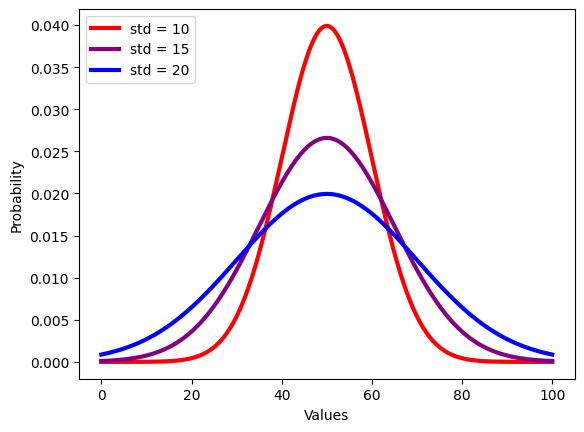

In [ ]:
# examining normal distribution with different variances
x = np.linspace(0, 100, 1000)
#three different probability density functions
pdf1 = stats.norm.pdf(x, 50, 10)
pdf2 = stats.norm.pdf(x, 50, 15)
pdf3 = stats.norm.pdf(x, 50, 20)

plt.plot(x, pdf1, color = 'red', lw = 3, label = 'std = 10')
plt.plot(x, pdf2, color = 'purple', lw = 3, label = 'std = 15')
plt.plot(x, pdf3, color = 'blue', lw = 3, label = 'std = 20')

plt.xlabel('Values')
plt.ylabel('Probability')
plt.legend(loc = 'upper left')

#plt.savefig("std.png", bbox_inches='tight')
#files.download("std.png")

Skewness

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

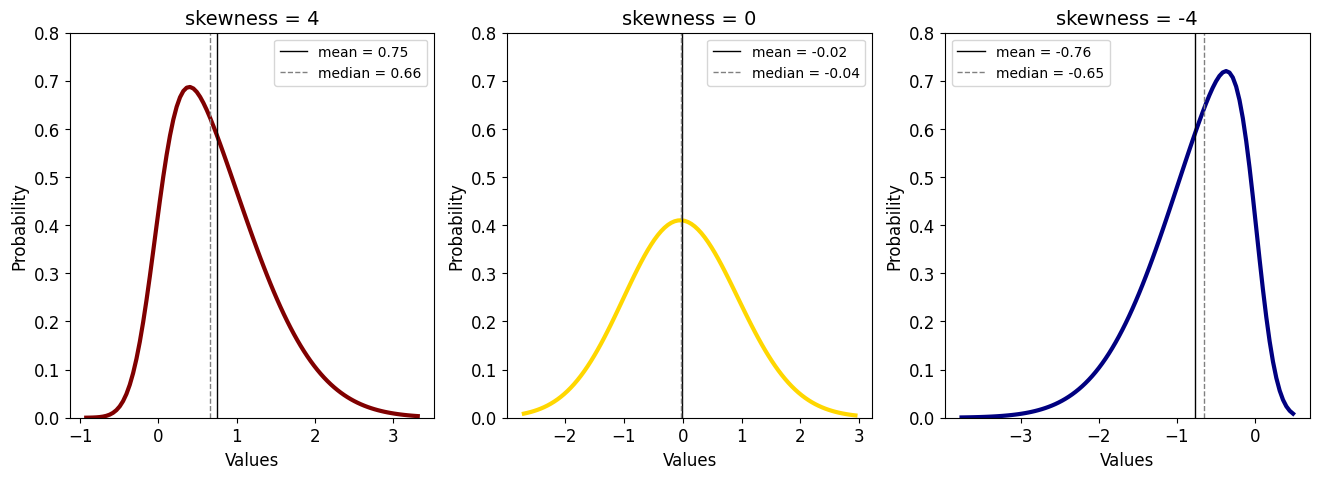

In [3]:
#creating distribution with different skewness values
data = stats.skewnorm(4, 0, 1).rvs(1000)
# estimate parameters from sample
ae, loce, scalee = stats.skewnorm.fit(data)
plt.subplot(1, 3, 1)
x = np.linspace(min(data), max(data), 100)
p = stats.skewnorm.pdf(x,ae, loce, scalee)
data_median = np.median(data)
data_mean = np.mean(data)
plt.plot(x, p, color = 'maroon', lw = 3)
plt.plot([data_mean, data_mean] , [0, 0.8], color = 'black', linewidth = 1,
           label = f'mean = {round(data_mean,2)}')
plt.plot([data_median, data_median] , [0, 0.8], color = 'gray', linewidth = 1, linestyle = '--',
           label = f'median = {round(data_median,2)}')
plt.legend(loc = 'upper right')
plt.title('skewness = 4', fontsize = 14)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Probability', fontsize = 12)
plt.ylim([0, 0.8])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

data = stats.skewnorm(0, 0, 1).rvs(1000)
# estimate parameters from sample
ae, loce, scalee = stats.skewnorm.fit(data)
plt.subplot(1, 3, 2)
x = np.linspace(min(data), max(data), 100)
p = stats.skewnorm.pdf(x,ae, loce, scalee)
data_median = np.median(data)
data_mean = np.mean(data)
plt.plot(x, p, color = 'gold', lw = 3)
plt.plot([data_mean, data_mean] , [0, 0.8], color = 'black', linewidth = 1,
           label = f'mean = {round(data_mean,2)}')
plt.plot([data_median, data_median] , [0, 0.8], color = 'gray', linewidth = 1, linestyle = '--',
           label = f'median = {round(data_median,2)}')
plt.legend(loc = 'upper right')
plt.title('skewness = 0', fontsize = 14)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Probability', fontsize = 12)
plt.ylim([0, 0.8])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

data = stats.skewnorm(-4, 0, 1).rvs(1000)
# estimate parameters from sample
ae, loce, scalee = stats.skewnorm.fit(data)
plt.subplot(1, 3, 3)
x = np.linspace(min(data), max(data), 100)
p = stats.skewnorm.pdf(x,ae, loce, scalee)
data_median = np.median(data)
data_mean = np.mean(data)
plt.plot(x, p, color = 'navy', lw = 3)
plt.plot([data_mean, data_mean] , [0, 0.8], color = 'black', linewidth = 1,
           label = f'mean = {round(data_mean,2)}')
plt.plot([data_median, data_median] , [0, 0.8], color = 'gray', linewidth = 1, linestyle = '--',
           label = f'median = {round(data_median,2)}')
plt.legend(loc = 'upper left')
plt.title('skewness = -4', fontsize = 14)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Probability', fontsize = 12)
plt.ylim([0, 0.8])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

fig = plt.gcf()
fig.set_size_inches(16, 5)

plt.savefig("skewness.png", bbox_inches='tight')
files.download("skewness.png")

Kurtosis

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

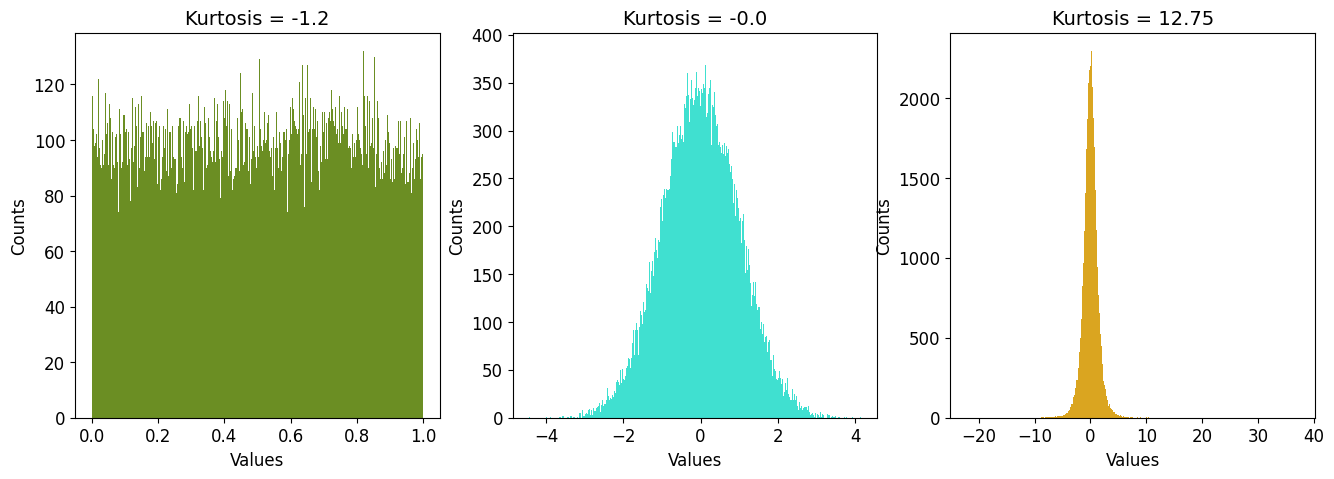

In [5]:
#creating datasets with different kurtosis values
data = np.random.normal(0, 1, 100000)
plt.subplot(1, 3, 2)
plt.hist(data, bins = 1000, color = 'turquoise');
plt.title(f'Kurtosis = {round(stats.kurtosis(data), 2)}', fontsize=14)
plt.xlabel('Values', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

data = np.random.uniform(0, 1, 100000)
plt.subplot(1, 3, 1)
plt.hist(data, bins = 1000, color = 'olivedrab');
plt.title(f'Kurtosis = {round(stats.kurtosis(data), 2)}', fontsize=14)
plt.xlabel('Values', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

data = np.random.standard_t(4, 100000)
plt.subplot(1, 3, 3)
plt.hist(data, bins = 1000, color = 'goldenrod');
plt.title(f'Kurtosis = {round(stats.kurtosis(data), 2)}', fontsize=14)
plt.xlabel('Values', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

fig = plt.gcf()
fig.set_size_inches(16, 5)

plt.savefig("kurtosis.png", bbox_inches='tight')
files.download("kurtosis.png")